# Assessment

## Question 1

Using the taiChiData.csv dataset, study the effect of treatment after 24 weeks.

In [1]:
from sklearn import linear_model # for linear regression modeling
from sklearn import preprocessing # for preprocessing like imputting missing values
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
%matplotlib inline 

#### Load the data

In [3]:
data = pd.read_csv('taiChiData.csv')

In [4]:
data.head()

,Unnamed: 0,Id,sex,BMI,duration,age,treatment,coexists,FIQ_baseline,FIQ_12W,FIQ_24W
0,1,22,1,45.9,13.3,56.25,control,none,57.0,52.0,50.0
1,2,11,1,28.7,9.2,47.21,control,hypertension,85.0,88.0,85.0
2,3,36,1,35.5,6.7,59.56,tai chi,hypertension,83.0,68.0,68.0
3,4,1,1,29.8,17.1,43.44,control,diabetes,74.0,60.0,62.0
4,5,9,1,34.0,12.2,49.99,control,heart disease,68.0,55.0,56.0


#### Data shape

In [5]:
data.shape

(50, 11)

#### Explore the data

#### Data columns

In [6]:
data.columns

Index(['Unnamed: 0', 'Id', 'sex', 'BMI', 'duration', 'age', 'treatment',
       'coexists', 'FIQ_baseline', 'FIQ_12W', 'FIQ_24W'],
      dtype='object')

#### Descriptive information

In [7]:
data.describe()

,Unnamed: 0,Id,sex,BMI,duration,age,FIQ_baseline,FIQ_12W,FIQ_24W
count,50.00000,50.00000,50.000000,50.000,50.000000,50.000000,46.000000,47.000000,49.000000
mean,25.50000,25.50000,0.780000,34.176,13.052000,49.531000,65.608696,59.234043,59.510204
std,14.57738,14.57738,0.418452,6.228,4.451931,7.267209,11.950785,12.173051,12.060822
min,1.00000,1.00000,0.000000,20.300,-1.800000,34.660000,42.000000,32.000000,38.000000
25%,13.25000,13.25000,1.000000,30.000,10.625000,43.992500,57.000000,51.000000,50.000000
50%,25.50000,25.50000,1.000000,34.750,13.350000,49.395000,66.000000,59.000000,60.000000
75%,37.75000,37.75000,1.000000,38.625,16.775000,55.780000,76.750000,68.000000,68.000000
max,50.00000,50.00000,1.000000,46.200,20.000000,62.730000,85.000000,88.000000,85.000000


#### mean values

In [8]:
data.mean()

Unnamed: 0      25.500000
Id              25.500000
sex              0.780000
BMI             34.176000
duration        13.052000
age             49.531000
FIQ_baseline    65.608696
FIQ_12W         59.234043
FIQ_24W         59.510204
dtype: float64

### Question 1.1

Plot a box-and-whisker plot to see the mean difference between 24 weeks and the baseline. Formulate a hypothesis about treatment after 24 weeks. Interpret the results obtained.

In [9]:
# data.FIQ_24W

In [10]:
# data.FIQ_baseline

#### 24 weeks and the baseline box plot 

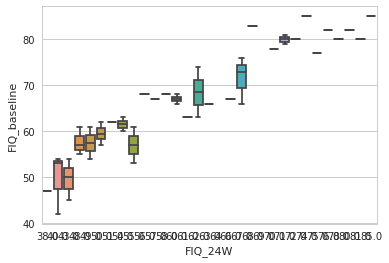

In [11]:
sns.boxplot(data.FIQ_24W, data.FIQ_baseline, orient='v') #use seaborn to plot boxplot

### Question 1.2

Visualize the data for baseline treatment and treatment after 24 weeks.

#### Data visualization of baseline treatment

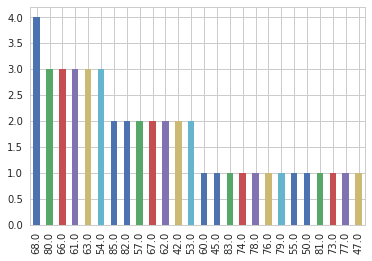

In [12]:
data.FIQ_baseline.value_counts().plot(kind='bar')

#### Data visualization of treatment after 24 weeks

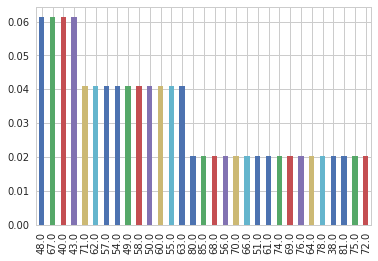

In [13]:
data.FIQ_24W.value_counts('data.FIQ_baseline').plot(kind='bar')

#### Scatter matrices: baseline treatment and treatment after 24 weeks

In [14]:
from pandas.tools import plotting

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e5c2f5cf8>,
      dtype=object)

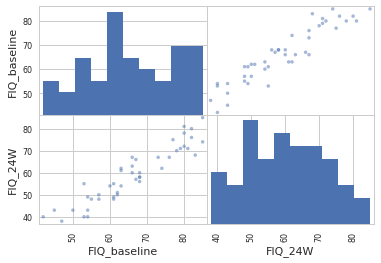

In [15]:
plotting.scatter_matrix(data[['FIQ_baseline', 'FIQ_24W']])

### Question 1.3

Formulate an hypothesis about pain severity before and after treatment in 24 weeks.

#### Correlation coefficient for baseline treatment and treatment after 24 weeks

In [16]:
import scipy.stats as stats

(nan, 1.0)


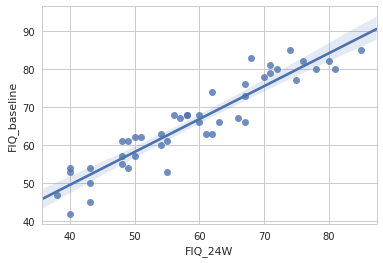

In [17]:
sns.regplot(data['FIQ_24W'], data['FIQ_baseline'])
print(stats.pearsonr(data['FIQ_24W'], data['FIQ_baseline']))

### Question 1.4

Discuss your results.

Pain severity correlate in range 50 t0 70 after 24 weeks of treatment.

## Question 2

The following is measurement data on the bonding strength of three types of resin. Are there any differences between the resin material? 
<img src='assessImg.PNG'>

Source: [Analysis of variance (ANOVA) comparing means of more than two groups](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3916511/)

In [18]:
import scipy.stats as stats

In [19]:
A = [19.7, 20.1, 21.3, 23.5, 9.3, 27.1, 11.6, 12.2, 15.9, 17.0, 17.2, 18.4, 19.8, 23.4, 28.0]

In [20]:
B = [23.0, 24.5, 24.6, 27.1, 12.0, 27.8, 12.8, 16.2, 19.8, 22.4, 23.6, 25.3, 27.9, 34.6, 35.2]

In [21]:
C = [21.6, 25.5, 25.9, 30.7, 33.0, 16.5, 22.7, 24.2, 26.2, 28.4, 28.5, 30.7, 32.2, 33.8, 34.5]

In [22]:
stats.f_oneway(A, B, C)

F_onewayResult(statistic=8.488055984887513, pvalue=0.0008017448866768368)

#### F_(observed) = MSB/MSW = (variance between groups)/(variance within groups) = 8.488

#### p_value = 0.0008017448866768368